In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import argparse
import math
import cv2

In [24]:
def sift(img1, img2):
    gray_img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    gray_img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)    

    sift_detector = cv.SIFT_create()
    (keypoints1, descriptions1) = sift_detector.detectAndCompute(gray_img1, None)
    (keypoints2, descriptions2) = sift_detector.detectAndCompute(gray_img2, None)

    print("Keypoints: {}, descriptors: {}".format(len(keypoints1), descriptions1.shape))
    print("Keypoints: {}, descriptors: {}".format(len(keypoints2), descriptions2.shape)) 
    return keypoints1, descriptions1, keypoints2, descriptions2

In [25]:
def mathcher(kps1, descs1, kps2, descs2,img1, img2):
    matches = []
    for i, k1 in enumerate(descs1):
        for j, k2 in enumerate(descs2):
            matches.append(cv.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
    matches = sorted(matches, key = lambda x : x.distance)
    
    img3 = cv.drawMatches(img1, kps1, img2, kps2, matches[:15], None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show()

In [26]:
first = cv.imread('image1.jpg')
second = cv.imread('image2.jpg')

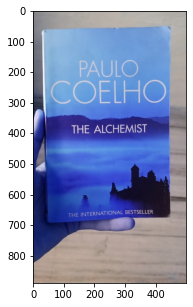

In [27]:
plt.figure(figsize=(5,5))
plt.imshow(first, cmap='gray')

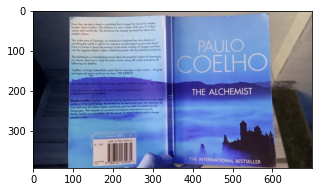

In [28]:
plt.figure(figsize=(5,5))
plt.imshow(second, cmap='gray')

In [29]:
kps1, descs1, kps2, descs2 = sift(first, second)

Keypoints: 583, descriptors: (583, 128)
Keypoints: 1270, descriptors: (1270, 128)


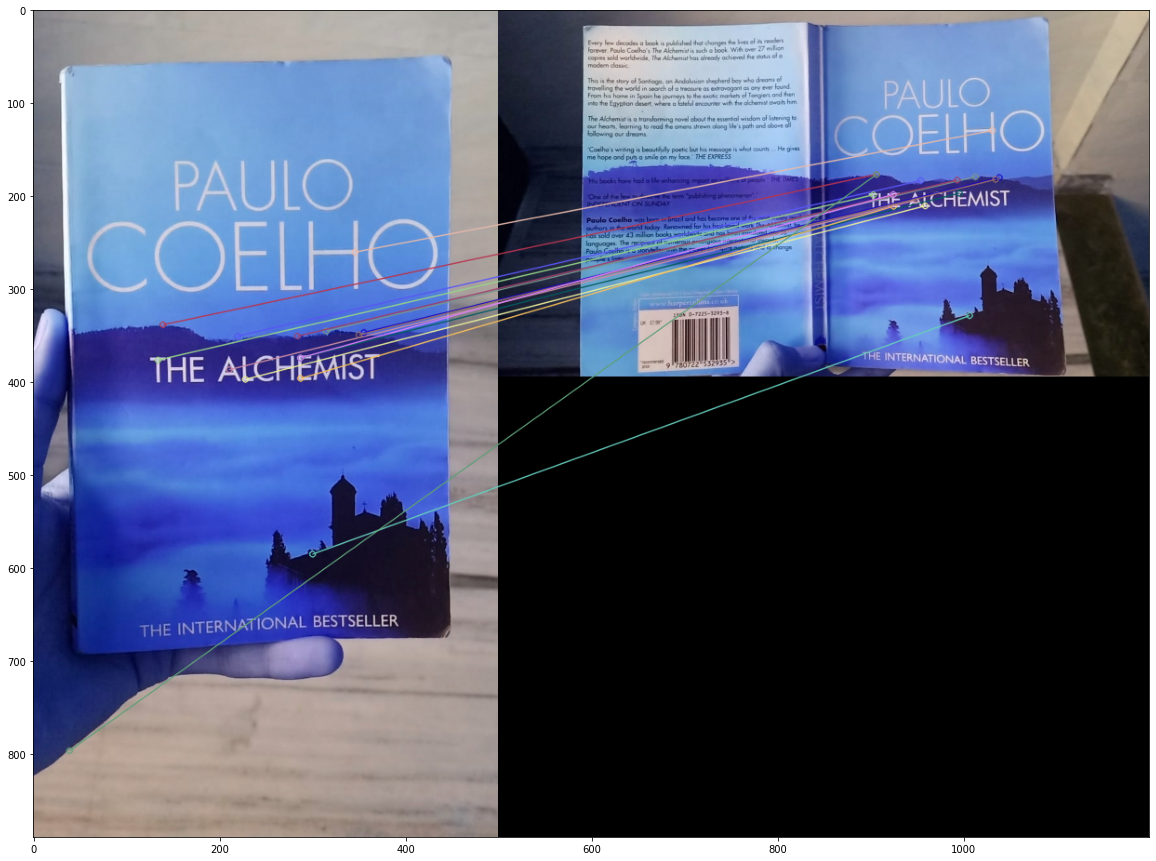

In [30]:
mathcher(kps1, descs1, kps2, descs2,first,second)